In [8]:
import csv
import os
import shutil
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [14]:
# os.chdir("./data/")
sourcedir = "./img_align_celeba/"
destinationdir = "./celebsaugmented"

images = []

with open(os.path.join('list_attr_celeba.csv'), mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=',')
    line_count = 0
    i = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count += 1
        if line_count >= 170400:
#             if row["Male"] == '-1' and row["Young"] == '1':
             if row["Male"] == '-1' and row["Pointy_Nose"] == '-1' and row["Bushy_Eyebrows"] == '-1' and row["High_Cheekbones"] == '-1' and row["Big_Nose"] == '1' and row["Pale_Skin"] == '-1' and row["Black_Hair"] == '1' and row["Young"] == '1':
#         if row["image_id"] != '013171.jpg' and row["image_id"] != '079484.jpg' and row["image_id"] != '080951.jpg'and row["image_id"] != '153566.jpg' and row["image_id"] != '185519.jpg' and row["image_id"] != '189767.jpg':
                images.append(row["image_id"])
#                 print(f'{row["image_id"]}.')
                #shutil.copy2(sourcedir+row["image_id"], destinationdir+"/caucasianwomen/")
                i += 1        
        line_count += 1


    print(f'Processed {line_count} lines and {i} matches.')

Column names are image_id, 5_o_Clock_Shadow, Arched_Eyebrows, Attractive, Bags_Under_Eyes, Bald, Bangs, Big_Lips, Big_Nose, Black_Hair, Blond_Hair, Blurry, Brown_Hair, Bushy_Eyebrows, Chubby, Double_Chin, Eyeglasses, Goatee, Gray_Hair, Heavy_Makeup, High_Cheekbones, Male, Mouth_Slightly_Open, Mustache, Narrow_Eyes, No_Beard, Oval_Face, Pale_Skin, Pointy_Nose, Receding_Hairline, Rosy_Cheeks, Sideburns, Smiling, Straight_Hair, Wavy_Hair, Wearing_Earrings, Wearing_Hat, Wearing_Lipstick, Wearing_Necklace, Wearing_Necktie, Young
Processed 202600 lines and 57 matches.


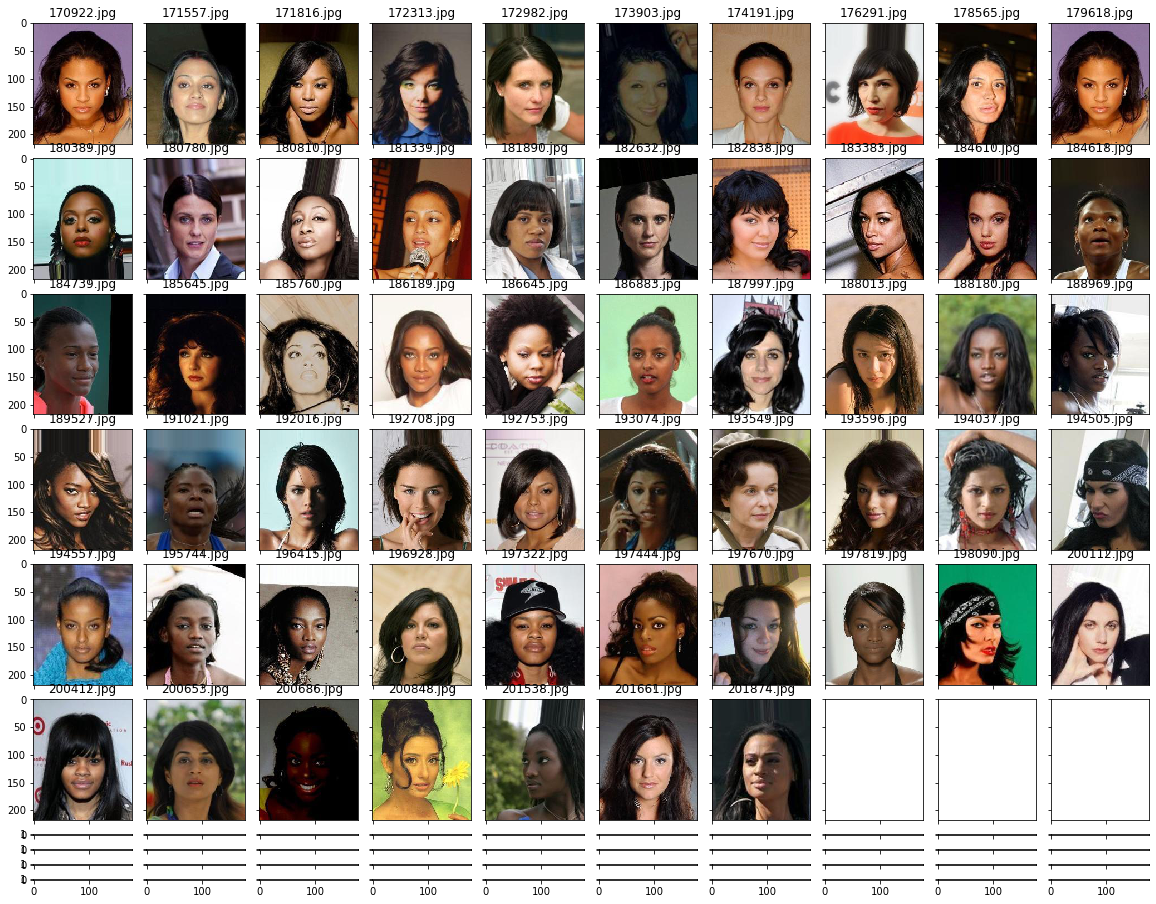

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
import numpy as np

imgs = []
for img in images:   
    i = Image.open(sourcedir + img)
    a = np.asarray(i) # a is readonly
    imgs.append(Image.fromarray(a))

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(10, 10),  # creates 2x2 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 )

i = 0
for ax, im in zip(grid, imgs):
    # Iterating over the grid returns the Axes.
    ax.set_title('{0}'.format(images[i]))
    i += 1
    ax.imshow(im)

plt.show()

In [21]:
dataroot = "/Users/marc/dlwpt-code/capstone/data/celebs/whitemen/"

# Number of workers for dataloader
workers = 2

# Batch size during training
batch_size = 64

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 64

# Number of channels in the training images. For color images this is 3
nc = 3

# Size of z latent vector (i.e. size of generator input)
nz = 100

# Size of feature maps in generator
ngf = 64

# Size of feature maps in discriminator
ndf = 64

# Number of training epochs
num_epochs = 5

# Learning rate for optimizers
lr = 0.0002

# Beta1 hyperparam for Adam optimizers
beta1 = 0.5

# Number of GPUs available. Use 0 for CPU mode.
ngpu = 0

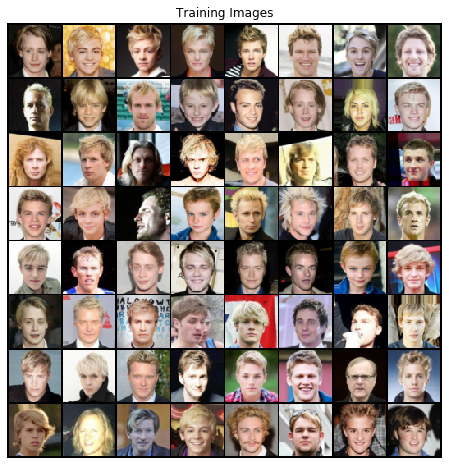

In [22]:
# Create the dataset

dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))